# Analysis of the 3D BAG metrics

This noteboook contains some analysis for extracting intresting information about the metrics computed via `cityStats.py`.

# Load data

Let's load the LoD2.2 data.

In [1]:
import pandas as pd

In [291]:
df = pd.read_csv("/home/alabetski/3DBAG_09/all/lod2.2.csv")
df = df.rename(columns={"rectangularity_3d": "cuboidness_3d", "equivalent_prism_3d": "equivalent_cuboidness_3d"})

In [237]:
clean = df[df["valid"]].set_index("id")
cols = ["3d_grid_point_count", "hole_count", 'horizontal_elongation', 'min_vertical_elongation',
       'max_vertical_elongation', "roughness_index_3d", "surface_area", "tile_id"]

clean.sort_values("roughness_index_3d", ascending=False).iloc[50:70][cols]

,3d_grid_point_count,hole_count,horizontal_elongation,min_vertical_elongation,max_vertical_elongation,roughness_index_3d,surface_area,tile_id
id,,,,,,,,
NL.IMBAG.Pand.1926100000495327-1,318,0,0.605488,0.928230,0.971686,12.197182,116.797555,3027
NL.IMBAG.Pand.0363100012141722-0,588,0,0.551481,0.765810,0.894961,12.149258,114.166300,4227
NL.IMBAG.Pand.0363100012191479-0,5070,0,0.956195,0.944623,0.208977,12.031771,821.546909,4288
NL.IMBAG.Pand.0344100000094494-0,3288,0,0.957305,0.931453,0.377144,11.946990,649.226051,3647
NL.IMBAG.Pand.0599100010044870-0,17814,0,0.828140,0.986284,0.920189,11.797194,5178.039004,3342
NL.IMBAG.Pand.0363100012148630-4,2448,0,0.733214,0.928264,0.980862,11.736095,775.191324,7108
NL.IMBAG.Pand.0599100100001556-0,2497730,1,0.936327,0.973969,0.591174,11.591622,109516.180360,3333
NL.IMBAG.Pand.0518100000272159-0,223755,0,0.944404,0.834071,0.664940,11.324731,18419.510863,3011
NL.IMBAG.Pand.0344100000129665-0,4332,0,0.952625,0.930000,0.323218,11.289030,671.280109,6505


In [6]:
attribute = "rectangularity_3d"

cols = [attribute, "tile_id", "ground_area"]
clean[clean["ground_area"] > 20].sort_values(attribute, ascending=True).iloc[0:20][cols]

,rectangularity_3d,tile_id,ground_area
id,,,
NL.IMBAG.Pand.0599100000647076-0,0.043136,3324,536.056999
NL.IMBAG.Pand.0518100001743971-0,0.044097,3019,180.728845
NL.IMBAG.Pand.0599100000657847-0,0.053815,3321,6760.558779
NL.IMBAG.Pand.0344100000074170-0,0.060349,1267,206.524033
NL.IMBAG.Pand.0518100000301148-0,0.062777,5874,1383.737208
NL.IMBAG.Pand.0363100012121369-0,0.066526,4348,959.505185
NL.IMBAG.Pand.0344100000137455-0,0.069294,3667,1737.267532
NL.IMBAG.Pand.0518100000285408-0,0.072097,5811,113.916819
NL.IMBAG.Pand.0363100012210437-0,0.073997,7105,598.588619


In [70]:
pd.options.display.max_rows = 80
pd.DataFrame(df.set_index("id").loc["NL.IMBAG.Pand.0518100000222277-0"])

,NL.IMBAG.Pand.0518100000222277-0
Unnamed: 0,484
type,BuildingPart
lod,2.2
point_count,402
unique_point_count,130
surface_count,73
actual_volume,1682.791075
convex_hull_volume,1938.59052
obb_volume,2466.465336
aabb_volume,4703.227849


In [22]:
df.set_index("id").loc["NL.IMBAG.Pand.0518100000226316-0"]["tile_id"]

5818

In [72]:
selected_ids = [
    "NL.IMBAG.Pand.0599100000702379-0",
    "NL.IMBAG.Pand.0518100001635181-0",
    "NL.IMBAG.Pand.0599100000701103-0",
#     "NL.IMBAG.Pand.0518100000225439-0",
    "NL.IMBAG.Pand.0518100000273015-0",
    "NL.IMBAG.Pand.0363100012075730-0",
    "NL.IMBAG.Pand.0363100012185598-0",
    "NL.IMBAG.Pand.0344100000031226-0",
    "NL.IMBAG.Pand.0344100000077683-0",
    "NL.IMBAG.Pand.0344100000099499-0",
    "NL.IMBAG.Pand.0599100000080428-0",
    "NL.IMBAG.Pand.0518100000230634-0",
#     "NL.IMBAG.Pand.0518100000206625-0",
    "NL.IMBAG.Pand.0518100000226316-0",
    "NL.IMBAG.Pand.0518100000282020-0",
    "NL.IMBAG.Pand.0599100000432858-0",
    "NL.IMBAG.Pand.0629100000020777-0",
    "NL.IMBAG.Pand.0363100012236081-0",
    "NL.IMBAG.Pand.0518100000222277-0"
]

df[df["id"].isin(selected_ids)].to_csv("selected.csv")

In [63]:
# Building of interest
pd.options.display.max_columns = 80
# boi = df.set_index("id").loc["NL.IMBAG.Pand.0518100000222277-0"] # WTC
boi = df.set_index("id").loc["NL.IMBAG.Pand.0344100000031226-0"] # Building A from paper

similar = clean[clean["ground_area"] > 20]

for attribute in clean.columns:
    if attribute.endswith("_2d") or attribute == "ground_area":
        similar = similar[(similar[attribute] < boi[attribute] * 1.05) & (similar[attribute] > boi[attribute] * 0.95)]

similar

,Unnamed: 0,type,lod,point_count,unique_point_count,surface_count,actual_volume,convex_hull_volume,obb_volume,aabb_volume,footprint_perimeter,obb_width,obb_length,surface_area,ground_area,wall_area,roof_area,ground_point_count,wall_point_count,roof_point_count,ground_surface-count,wall_surface_count,roof_surface_count,max_Z,min_Z,height_range,mean_Z,median_Z,std_Z,mode_Z,ground_Z,orientation_values,orientation_edges,errors,valid,hole_count,geometry,2d_grid_point_count,3d_grid_point_count,circularity_2d,hemisphericality_3d,convexity_2d,convexity_3d,fractality_2d,fractality_3d,rectangularity_2d,rectangularity_3d,squareness_2d,cubeness_3d,horizontal_elongation,min_vertical_elongation,max_vertical_elongation,form_factor_3D,equivalent_rectangularity_index_2d,equivalent_prism_index_3d,proximity_index_2d_,proximity_index_3d,exchange_index_2d,exchange_index_3d,spin_index_2d,spin_index_3d,perimeter_index_2d,circumference_index_3d,depth_index_2d,depth_index_3d,girth_index_2d,girth_index_3d,dispersion_index_2d,dispersion_index_3d,range_index_2d,range_index_3d,roughness_index_2d,roughness_index_3d,shared_walls_area,closest_distance,file,tile_id,statnaam
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NL.IMBAG.Pand.0599100010017103-0,1031,BuildingPart,2.2,158,55,32,4803.638684,5315.915484,5890.572061,9307.853490,82.662206,18.741638,22.629708,1889.074473,421.081041,1035.472637,428.157696,14,110,34,1,27,4,17.237,13.247,3.990,14.574971,13.9055,1.455519,17.237,3.348,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[ 0. 10. 20. 30. 40. 50. 60. 70. 80. ...,[],True,0,"POLYGON Z ((93374.515 435241.155 3.348, 93374....",2750,41184,0.774393,0.443690,0.997109,0.903633,0.315612,0.250296,0.992840,0.815479,0.992969,0.909348,0.171813,0.238302,0.080283,1.479059,0.997384,0.928146,0.975824,0.877133,0.895046,0.696424,0.937748,0.744474,0.879996,0.732931,0.874990,0.646808,0.804381,0.502018,0.893556,0.810924,0.788629,0.646236,0.829157,0.795886,564.227498,0.000000,3346.csv,3346,Rotterdam
NL.IMBAG.Pand.0344100000084737-0,1414,BuildingPart,2.2,102,34,19,2926.698918,2929.481923,2946.495508,3712.888066,83.018930,19.746451,21.818460,1424.756667,429.403847,565.836585,429.404409,17,68,17,1,17,1,7.647,7.600,0.047,7.622118,7.6220,0.016139,7.600,0.808,[ 0. 148.85127361 0. 0. ...,[ 0. 10. 20. 30. 40. 50. 60. 70. 80. ...,[],True,0,POLYGON Z ((129277.199 456882.095 0.8080000000...,2205,23361,0.782927,0.409288,0.999091,0.999050,0.314064,0.267237,0.996673,0.993281,0.998426,0.861714,0.094966,0.649517,0.612741,2.098685,0.999669,0.999397,0.981588,0.795493,0.905098,0.542456,0.951128,0.602690,0.884832,0.694538,0.883773,0.615158,0.842497,0.365721,0.903107,0.740559,0.798880,0.590441,0.833732,0.902353,0.000000,6.324078,3658.csv,3658,Utrecht
NL.IMBAG.Pand.0599100010033052-0,98,BuildingPart,2.2,146,48,27,3075.518052,3166.415147,3284.134322,6463.822693,81.746466,18.582037,21.803238,1457.059221,394.106053,645.255771,394.152378,22,98,26,1,24,2,12.084,11.398,0.686,11.685654,11.8350,0.256213,11.398,3.978,[ 0. 0. 0. 0. ...,[ 0. 10. 20. 30. 40. 50. 60. 70. 80. ...,[],True,0,POLYGON Z ((74005.68799999999 436356.502 3.978...,3249,26481,0.741114,0.426115,0.984673,0.971293,0.321397,0.263313,0.972745,0.936478,0.971399,0.885173,0.147740,0.445770,0.349695,1.863521,0.974504,0.978230,0.977234,0.820761,0.896668,0.606857,0.940480,0.643750,0.860880,0.713446,0.869577,0.615915,0.826853,0.421790,0.895182,0.766812,0.781947,0.607408,0.798541,0.875097,0.000000,17.803904,919.csv,919,Rotterdam
NL.IMBAG.Pand.0599100000701615-0,207,BuildingPart,2.2,362,124,69,9810.535709,10339.153168,12384.570747,20848.272693,83.141733,18.901913,22.511664,2928.665417,424.010214,1794.956147,694.908745,33,254,75,1,62,6,27.807,6.177,21.630,22.055840,23.9180,6.277097,23.914,-1.298,[ 0. 6.67524006 551.28357424 0. ...,[ 0. 10. 20. 30. 40. 50. 60. 70. 80. ...,[],True,0,POLYGON Z ((93356.34300000001 433490.871 -1.29...,2912,84691,0.770811,0.470415,0.997384,0.948872,0.315723,0.231690,0.996467,0.792158,0.990

In [45]:
bois = ["NL.IMBAG.Pand.0599100000617974-0"] + list(similar.reset_index()["id"])

cols = [col for col in clean.columns if col.endswith("_3d")] + ["id"]
df[df["id"].isin(bois)][cols].set_index("id")

,hemisphericality_3d,convexity_3d,fractality_3d,rectangularity_3d,cubeness_3d,equivalent_prism_index_3d,proximity_index_3d,exchange_index_3d,spin_index_3d,circumference_index_3d,depth_index_3d,girth_index_3d,dispersion_index_3d,range_index_3d,roughness_index_3d
id,,,,,,,,,,,,,,,
NL.IMBAG.Pand.0599100000617974-0,0.142719,0.424353,0.238770,0.230812,0.426905,0.430314,0.677916,-1.000000,0.438657,0.344084,0.290411,0.254261,0.688527,0.498010,0.363539
NL.IMBAG.Pand.0599100010070665-0,0.096034,0.959877,0.285793,0.922752,0.327815,1.020803,0.404482,0.141860,0.151043,0.264217,0.203846,0.095417,0.477240,0.278050,1.031705
NL.IMBAG.Pand.1783100000021429-0,0.080166,0.962191,0.293990,0.908351,0.290628,1.025586,0.387840,0.124027,0.140653,0.234245,0.177364,0.074305,0.464252,0.274969,0.966489
NL.IMBAG.Pand.1783100000047561-0,0.082382,0.932241,0.294361,0.872514,0.295960,1.037242,0.383482,0.126728,0.135480,0.238543,0.180278,0.076437,0.458135,0.259639,1.028736
NL.IMBAG.Pand.1783100000019092-0,0.079467,0.927212,0.297851,0.864363,0.288936,1.040467,0.384629,0.123324,0.138118,0.232881,0.169476,0.078888,0.460832,0.277149,0.981868
NL.IMBAG.Pand.1783100000056207-0,0.101844,0.984699,0.278123,0.967550,0.340906,1.008466,0.418350,0.147833,0.162839,0.274769,0.196275,0.092236,0.489727,0.302184,1.002510


In [236]:
boi

Unnamed: 0                                                                          484
type                                                                       BuildingPart
lod                                                                                 2.2
point_count                                                                         402
unique_point_count                                                                  130
surface_count                                                                        73
actual_volume                                                               1682.791075
convex_hull_volume                                                           1938.59052
obb_volume                                                                  2466.465336
aabb_volume                                                                 4703.227849
footprint_perimeter                                                           81.633075
obb_width                       

In [32]:
df[df["tile_id"] == 3344].set_index("id").loc["NL.IMBAG.Pand.0599100000675409-0"][cols]

3d_grid_point_count      236423
roughness_index_2d     0.710513
roughness_index_3d     0.946477
tile_id                    3344
Name: NL.IMBAG.Pand.0599100000675409-0, dtype: object

In [34]:
import math

4/3*math.pi + math.pow(4*math.pi, 3/2)

48.735414179440056

In [39]:
[col for col in clean.columns if col.endswith("_3d")]

['hemisphericality_3d',
 'convexity_3d',
 'fractality_3d',
 'rectangularity_3d',
 'cubeness_3d',
 'equivalent_prism_index_3d',
 'proximity_index_3d',
 'exchange_index_3d',
 'spin_index_3d',
 'circumference_index_3d',
 'depth_index_3d',
 'girth_index_3d',
 'dispersion_index_3d',
 'range_index_3d',
 'roughness_index_3d']

In [106]:
def get_bag_id(attribute, value):
    return buildings[attribute].sub(value).abs().idxmin()

buildings = clean[clean["ground_area"] > 20]

for attribute in clean.columns:
    if attribute.endswith("_3d"):
        cols = [attribute, "tile_id", "ground_area"]
        bag_id = get_bag_id(attribute, 0)
        tile_id = buildings.loc[bag_id]["tile_id"]
        
        print(f"{buildings.loc[bag_id][attribute]}_{bag_id}")
        print(f"{attribute}: {buildings[attribute].min()} - {buildings[attribute].max()}")

0.0284824544070598_NL.IMBAG.Pand.0599100000657847-0
hemisphericality_3d: 0.0284824544070598 - 0.5952215940868545
0.074540476332761_NL.IMBAG.Pand.0518100001743971-0
convexity_3d: 0.074540476332761 - 1.0000000000130742
0.186480710276369_NL.IMBAG.Pand.0363100012197116-0
fractality_3d: 0.186480710276369 - 0.5988077857311471
0.0431361185300923_NL.IMBAG.Pand.0599100000647076-0
rectangularity_3d: 0.0431361185300923 - 0.999998542528817
0.1457903342617595_NL.IMBAG.Pand.0599100000657847-0
cubeness_3d: 0.1457903342617595 - 1.106104714832591
0.2281993643576471_NL.IMBAG.Pand.0363100012234896-0
equivalent_prism_index_3d: 0.2281993643576471 - 1.250374074970948
0.1064624056447387_NL.IMBAG.Pand.0344100000086977-0
proximity_index_3d: 0.1064624056447387 - 1.0461914207887106
0.0_NL.IMBAG.Pand.0363100012117662-0
exchange_index_3d: -1.0 - 0.8910287506728821
0.0091204824889335_NL.IMBAG.Pand.0344100000086977-0
spin_index_3d: 0.0091204824889335 - 1.0769920520320309
0.117506422901664_NL.IMBAG.Pand.0599100000657

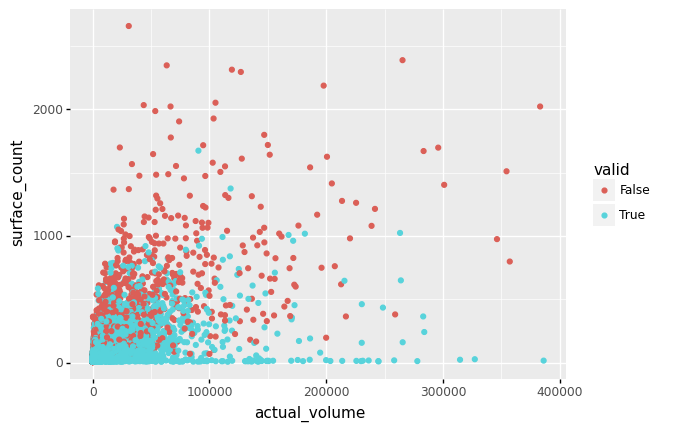

<ggplot: (8777032188919)>

In [108]:
from plotnine import *
%matplotlib inline

(ggplot(df[(df["actual_volume"]<400000) & (df["surface_count"] < 3000)].head(200000))         # defining what data to use
 + aes(x='actual_volume', y='surface_count', color='valid')    # defining what variable to use
 + geom_point() # defining the type of plot to use
)

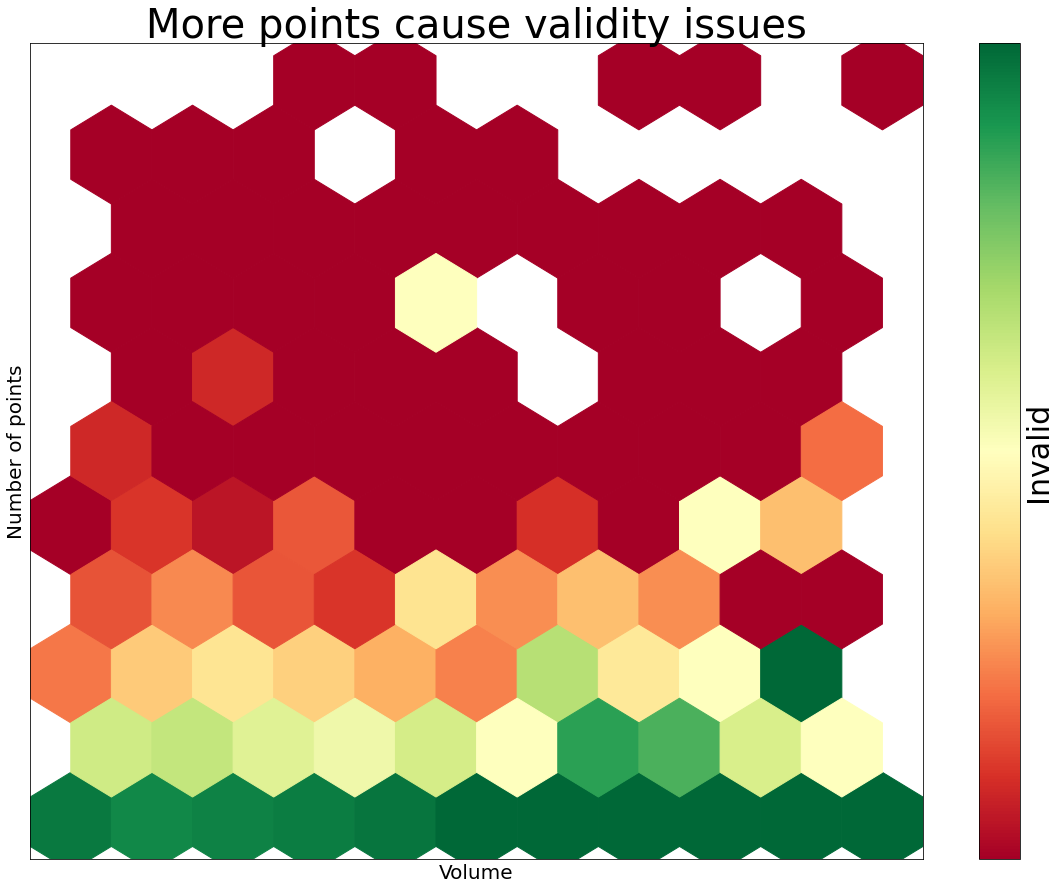

In [174]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
from matplotlib import cm as CM

subset = df[(df["actual_volume"]<400000) & (df["surface_count"] < 3000)]#.head(200000)

# Generate some test data
x = subset["actual_volume"] / 100
y = subset["surface_count"]

# plt.clf()
# plt.imshow(heatmap.T, extent=extent, origin='lower')
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)

plt.xlabel('Volume', fontsize=20)
plt.ylabel('Number of points', fontsize=20)

plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

plt.hexbin(x, y, C=subset["valid"], gridsize=10, cmap=CM.RdYlGn, bins=None)

cb = plt.colorbar()
cb.set_label('Invalid', fontsize=30)
cb.set_ticks([])

plt.title('More points cause validity issues', fontsize=40)

plt.show()

In [112]:
heatmap

array([[1.74202e+05, 1.84250e+04, 2.38200e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.68000e+02, 5.11000e+02, 3.32000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.19000e+02, 1.81000e+02, 1.51000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [77]:
clean.head(100)

,Unnamed: 0,type,lod,point_count,unique_point_count,surface_count,actual_volume,convex_hull_volume,obb_volume,aabb_volume,footprint_perimeter,obb_width,obb_length,surface_area,ground_area,wall_area,roof_area,ground_point_count,wall_point_count,roof_point_count,ground_surface-count,wall_surface_count,roof_surface_count,max_Z,min_Z,height_range,mean_Z,median_Z,std_Z,mode_Z,ground_Z,orientation_values,orientation_edges,errors,valid,hole_count,geometry,2d_grid_point_count,3d_grid_point_count,circularity_2d,hemisphericality_3d,convexity_2d,convexity_3d,fractality_2d,fractality_3d,rectangularity_2d,rectangularity_3d,squareness_2d,cubeness_3d,horizontal_elongation,min_vertical_elongation,max_vertical_elongation,form_factor_3D,equivalent_rectangularity_index_2d,equivalent_prism_index_3d,proximity_index_2d_,proximity_index_3d,exchange_index_2d,exchange_index_3d,spin_index_2d,spin_index_3d,perimeter_index_2d,circumference_index_3d,depth_index_2d,depth_index_3d,girth_index_2d,girth_index_3d,dispersion_index_2d,dispersion_index_3d,range_index_2d,range_index_3d,roughness_index_2d,roughness_index_3d,shared_walls_area,closest_distance,file,tile_id,statnaam
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NL.IMBAG.Pand.0599100000024126-0,0,BuildingPart,2.2,160,52,30,610.586777,699.866317,726.816492,1764.828944,36.026939,4.694716,13.506881,521.979810,61.707028,394.511404,62.257264,19,108,33,1,26,3,14.828,11.752,3.076,13.651848,14.4070,1.238991,11.814,3.366,[ 0. 0. 0. 62.70...,[ 0. 10. 20. 30. 40. 50. 60. 70. 80. ...,[],True,0,POLYGON Z ((93805.35699999999 435887.035 3.366...,648,5881,0.597434,0.388924,0.992333,0.872433,0.424932,0.315893,0.973129,0.840084,0.872168,0.832889,0.652420,0.089096,0.683388,0.857373,0.996775,0.934283,0.812112,0.799861,0.640265,0.582916,0.607480,0.608093,0.772938,0.671305,0.699109,0.558494,0.526270,0.444397,0.682751,0.740476,0.626237,0.582210,0.779703,0.908015,257.934578,0.0,3346.csv,3346,Rotterdam
NL.IMBAG.Pand.0599100000024359-0,1,BuildingPart,2.2,116,38,22,275.016976,289.794285,305.826657,782.642116,33.693961,4.221755,12.631324,288.926024,50.907507,184.721679,50.912356,16,78,22,1,19,2,9.262,6.908,2.354,8.191909,9.2140,1.138480,9.262,3.527,[ 0. 0. 0. 0. ...,[ 0. 10. 20. 30. 40. 50. 60. 70. 80. ...,[],True,0,POLYGON Z ((94244.88799999999 436274.776 3.527...,575,2597,0.563492,0.426368,0.977145,0.949008,0.441334,0.338171,0.954641,0.899258,0.847030,0.885523,0.665771,0.266744,0.544185,1.203766,0.977411,0.975270,0.802548,0.791133,0.634697,0.600061,0.590611,0.583310,0.750661,0.713728,0.691085,0.617850,0.516510,0.518459,0.675408,0.723983,0.604709,0.557307,0.761026,1.035867,133.100686,0.0,3346.csv,3346,Rotterdam
NL.IMBAG.Pand.0599100000030643-0,2,BuildingPart,2.2,190,62,35,604.059229,684.808441,697.878912,1699.473369,36.067195,4.737585,13.258945,515.345247,60.912736,393.008935,60.917417,22,128,40,1,31,3,14.472,11.747,2.725,13.315800,14.2505,1.246585,14.275,3.362,[ 0. 0. 0. 63.25...,[ 0. 10. 20. 30. 40. 50. 60. 70. 80. ...,[],True,0,"POLYGON Z ((93789.05099999999 435913.78 3.362,...",648,5786,0.588428,0.388847,0.981980,0.882085,0.426917,0.316270,0.969711,0.865565,0.865569,0.832779,0.642688,0.083821,0.672638,0.852423,0.982715,0.927063,0.823665,0.807753,0.649593,0.593853,0.626584,0.621445,0.767091,0.671216,0.711679,0.564795,0.537057,0.448319,0.687661,0.747997,0.625486,0.584796,0.771983,0.895806,257.836649,0.0,3346.csv,3346,Rotterdam
NL.IMBAG.Pand.0599100000034717-0,3,BuildingPart,2.2,98,32,19,340.366176,355.113859,370.460512,947.215022,34.300273,4.490567,12.622016,326.385780,55.026256,214.171745,55.032037,13,66,19,1,16,2,9.306,6.948,2.358,8.043895,6.9710,1.142115,6.971,2.770,[ 0. 0. 0. 0. ...,[ 0. 10. 20. 30. 40. 50. 60. 70. 80. ...,[],True,0,"POLYGON Z ((94230.41299999999 436290.033 2.77,...",600,3286,0.587739,0.438405,0.980553,0.958471,0.433149,0.327733,0.970823,0.918765,0.865062,0.902112,0.644227,0.262717,0.517455,1.128771,0.983146,0.982464,0.804709,0.797462,0.628040,0.602898,0.594455,0.597909,0

In [182]:
selected_ids = [
    "NL.IMBAG.Pand.0344100000031226-0",
    "NL.IMBAG.Pand.0344100000077683-0",
    "NL.IMBAG.Pand.0344100000099499-0",
    "NL.IMBAG.Pand.0518100000273015-0",
    "NL.IMBAG.Pand.0363100012075730-0",
    "NL.IMBAG.Pand.0363100012236081-0",
    "NL.IMBAG.Pand.0518100000282020-0",
    "NL.IMBAG.Pand.0518100000226316-0",
    "NL.IMBAG.Pand.0518100001635181-0",
    "NL.IMBAG.Pand.0599100000080428-0",
    "NL.IMBAG.Pand.0599100000432858-0",
    "NL.IMBAG.Pand.0599100000701103-0",
    "NL.IMBAG.Pand.0599100000702379-0",
    "NL.IMBAG.Pand.0629100000020777-0"
]

df[df["id"].isin(selected_ids)]

,Unnamed: 0,id,type,lod,point_count,unique_point_count,surface_count,actual_volume,convex_hull_volume,obb_volume,aabb_volume,footprint_perimeter,obb_width,obb_length,surface_area,ground_area,wall_area,roof_area,ground_point_count,wall_point_count,roof_point_count,ground_surface-count,wall_surface_count,roof_surface_count,max_Z,min_Z,height_range,mean_Z,median_Z,std_Z,mode_Z,ground_Z,orientation_values,orientation_edges,errors,valid,hole_count,geometry,2d_grid_point_count,3d_grid_point_count,circularity_2d,hemisphericality_3d,convexity_2d,convexity_3d,fractality_2d,fractality_3d,rectangularity_2d,rectangularity_3d,squareness_2d,cubeness_3d,horizontal_elongation,min_vertical_elongation,max_vertical_elongation,form_factor_3D,equivalent_rectangularity_index_2d,equivalent_prism_index_3d,proximity_index_2d_,proximity_index_3d,exchange_index_2d,exchange_index_3d,spin_index_2d,spin_index_3d,perimeter_index_2d,circumference_index_3d,depth_index_2d,depth_index_3d,girth_index_2d,girth_index_3d,dispersion_index_2d,dispersion_index_3d,range_index_2d,range_index_3d,roughness_index_2d,roughness_index_3d,shared_walls_area,closest_distance,file,tile_id,statnaam
38667,16,NL.IMBAG.Pand.0599100000080428-0,BuildingPart,2.2,290,94,53,6.744269e+02,7.785695e+02,9.673474e+02,1.643580e+03,36.295318,7.188033,11.027326,517.886062,75.701038,342.799948,92.839519,24,196,70,1,47,5,9.469,-0.107,9.576,5.299657,5.6480,3.334568,-0.070,-2.735,[ 0. 0. 0. 0. ...,[ 0. 10. 20. 30. 40. 50. 60. 70. 80. ...,[],True,0,"POLYGON Z ((93235.462 439981.005 -2.735, 93236...",550,6469,0.722122,0.438610,0.980825,0.866238,0.397666,0.303744,0.955040,0.697192,0.958871,0.902394,0.348162,0.141315,0.240888,0.984340,0.980907,0.927401,0.950334,0.891811,0.826829,0.778843,0.878093,0.776160,0.849778,0.727326,0.831104,0.632717,0.701293,0.640939,0.837468,0.850441,0.750624,0.652878,0.804926,0.773987,69.375331,-0.000000,3341.csv,3341,Rotterdam
104871,1531,NL.IMBAG.Pand.0518100001635181-0,BuildingPart,2.2,9515,3236,1786,4.708345e+05,7.914225e+05,8.979447e+05,1.770653e+06,371.109152,71.901625,83.633137,73464.000843,5017.418420,56869.521275,6088.981046,167,6730,2618,1,1626,159,150.043,7.029,143.014,110.152526,139.3980,45.493484,144.670,0.718,[ 113.07680394 489.26418554 456.08652148 ...,[ 0. 10. 20. 30. 40. 50. 60. 70. 80. ...,"[104, 104, 203]",False,17,"POLYGON Z ((81978.833 455029.549 0.718, 81978....",47520,3916434,0.457812,0.204419,0.835583,0.594922,0.279923,0.216299,0.834379,0.524347,0.763481,0.542448,0.140273,0.442606,0.520793,0.829026,0.765663,0.568016,0.911152,0.729975,0.807091,-1.000000,0.806256,0.511078,0.676618,0.437211,0.670737,0.427606,0.584964,0.437892,0.791911,0.693084,0.725105,0.535593,0.497944,0.474579,0.000000,19.541119,2986.csv,2986,'s-Gravenhage
205284,2187,NL.IMBAG.Pand.0629100000020777-0,BuildingPart,2.2,2828,951,508,5.930401e+04,1.204885e+05,2.001055e+05,3.207576e+05,668.904899,74.743678,164.075688,29754.778398,7072.095355,8029.255613,6893.734757,238,1950,640,1,476,31,16.576,3.730,12.846,9.301386,7.8800,3.320107,7.577,0.259,[1.83445715e+01 1.99537736e+01 1.92713826e+01 ...,[ 0. 10. 20. 30. 40. 50. 60. 70. 80. ...,[],True,0,POLYGON Z ((82354.09899999999 457133.116 0.259...,78769,508137,0.198623,0.140038,0.676812,0.492197,0.318752,0.266024,0.576673,0.296364,0.502886,0.421543,0.544456,0.898973,0.778229,4.650419,0.542250,0.663744,0.666972,0.410187,0.529443,0.141762,0.426626,0.149263,0.445671,0.339762,0.413663,0.297044,0.438572,0.299251,0.561284,0.470751,0.540266,0.275231,0.210777,1.533010,0.000000,17.751957,2987.csv,2987,'s-Gravenhage
214824,36,NL.IMBAG.Pand.0599100000432858-0,BuildingPart,2.2,3151,1040,575,7.671449e+04,8.977299e+04,1.046210e+05,1.429581e+05,131.511305,30.643806,32.197540,20053.307700,875.673236,17590.001128,950.906916,85,2182,884,1,522,52,109.430,3.443,105.987,88.937360,101.9005,31.402813,95.148,3.394,[ 361.75523704 8.78693206 13.40077489 17...,[ 0. 10. 20. 30. 40. 50. 60. 70. 80. ...,[104],False,5,POLYGON Z ((92829.44100000001 436968.987 3.394...,5476,652877,0

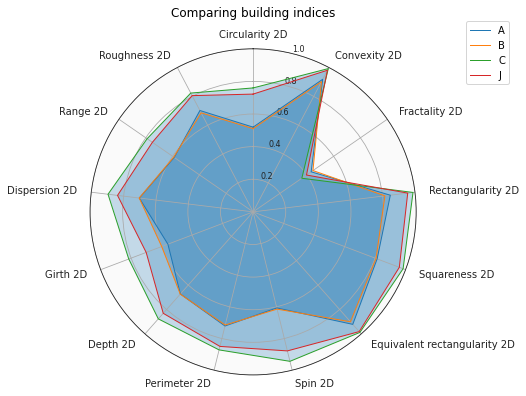

In [235]:
import random

def get_random_color():
    hexadecimal = ["#"+''.join([random.choice('abcdef0123456789') for i in range(6)])]

# Each attribute we'll plot in the radar chart.
labels = [col for col in df.columns if col.endswith("_2d") and not col.startswith("exchange")]

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(car_model, color, label=None):
    values = df.set_index("id").loc[car_model][labels].tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=1, label=car_model if label is None else label)
    ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar('NL.IMBAG.Pand.0344100000031226-0', get_random_color(), 'A')
add_to_radar('NL.IMBAG.Pand.0344100000077683-0', get_random_color(), 'B')
add_to_radar('NL.IMBAG.Pand.0344100000099499-0', get_random_color(), 'C')
add_to_radar('NL.IMBAG.Pand.0599100000080428-0', get_random_color(), 'J')

# for number, objid in enumerate(selected_ids):
#     add_to_radar(objid, get_random_color(), chr(ord('@')+number+1))

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles[:-1]), [col.replace("_", " ").capitalize().replace(" index", "").replace("2d", "2D").replace("3d", "3D") for col in labels])

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 1)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
ax.set_title('Comparing building indices', y=1.08)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

fig.savefig("BuildingsSpider2D.pdf")

## Clean the data

Clean data is:
- No holes
- At least 40m3
- All indices are of value between 0 to 1.2

Super-clean data is:
- All of the above
- They are valid

All data size is:

In [288]:
len(df)

841907

Clean data is:

In [289]:
df.columns

Index(['id', 'oorspronkelijkbouwjaar'], dtype='object')

## PCA of existing data

This is a Principal Component Analysis of the data to identify the most important features in the dataset.

## Clustering of buildings

The following code will cluster buildings based on the 3D indices (it can be easily adapted to worko with 2D or any number of attributes).

In [269]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import math
import scipy

indices_3d = [col for col in clean.columns if col.endswith("_3d")]

sample = clean[clean["ground_area"] > 20].head(100000)

data = np.array(sample[indices_3d])
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.5, linkage='average').fit(data)

In [270]:
clustering.n_clusters_

96

In [272]:
sample["cluster"] = clustering.labels_

sample.to_csv("clustering_sample_100k.csv")

## Extract the construction year from CityJSON

The following snippet will iterate through all CityJSON files and extract the year of construction attribute (*oorspronkelijkbouwjaar*) for all buildings.

In [290]:
import json
from pandas import DataFrame

# import os
# files = [f for f in os.listdir('.') if os.path.isfile(f)]

import glob
from tqdm.notebook import tqdm

files = glob.glob("/home/alabetski/3DBAG_09/*.json")

data = []

i = 0
for file in tqdm(files):
    with open(file) as stream:
        cm = json.load(stream)

        for objid in cm["CityObjects"]:
            co = cm["CityObjects"][objid]
            
            if "oorspronkelijkbouwjaar" in co["attributes"]:
                data.append([objid, co["attributes"]["oorspronkelijkbouwjaar"]])

columns = ["id", "oorspronkelijkbouwjaar"]

jaars = DataFrame(data, columns=columns)
jaars.to_csv("jaars.csv")

  0%|          | 0/647 [00:00<?, ?it/s]

KeyboardInterrupt: 